In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense 

In [ ]:
data = pd.read_csv('GOOG.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-07,1819.000000,1832.369995,1805.780029,1819.479980,1819.479980,1320900
1,2020-12-08,1810.099976,1821.900024,1796.204956,1818.550049,1818.550049,1096300
2,2020-12-09,1812.010010,1834.270020,1767.810059,1784.130005,1784.130005,1507600
3,2020-12-10,1769.800049,1781.310059,1740.319946,1775.329956,1775.329956,1362800
4,2020-12-11,1763.060059,1784.449951,1760.000000,1781.770020,1781.770020,1220700


In [ ]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2021-11-29,2885.969971,2937.239990,2885.969971,2922.280029,2922.280029,1313800
247,2021-11-30,2909.004883,2932.570068,2841.320068,2849.040039,2849.040039,2079500
248,2021-12-01,2884.250000,2929.982910,2830.000000,2832.360107,2832.360107,1423800
249,2021-12-02,2836.479980,2893.500000,2819.639893,2875.530029,2875.530029,1062500
250,2021-12-03,2889.909912,2904.260010,2823.000000,2850.409912,2850.409912,1333800


In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.shape

(251, 7)

In [ ]:
data_close = data['Close']
data_close

0      1819.479980
1      1818.550049
2      1784.130005
3      1775.329956
4      1781.770020
          ...     
246    2922.280029
247    2849.040039
248    2832.360107
249    2875.530029
250    2850.409912
Name: Close, Length: 251, dtype: float64

In [ ]:
data_close.reset_index()['Close']

0      1819.479980
1      1818.550049
2      1784.130005
3      1775.329956
4      1781.770020
          ...     
246    2922.280029
247    2849.040039
248    2832.360107
249    2875.530029
250    2850.409912
Name: Close, Length: 251, dtype: float64

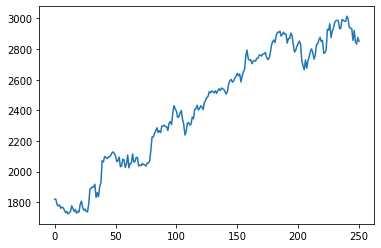

In [ ]:
plt.plot(data_close)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler(feature_range = (0,1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1,1))

In [ ]:
data_close

array([[0.07436389],
       [0.07364339],
       [0.04697524],
       [0.04015709],
       [0.04514676],
       [0.0283262 ],
       [0.03429977],
       [0.03060402],
       [0.01890478],
       [0.00581865],
       [0.01229584],
       [0.        ],
       [0.0068801 ],
       [0.01189294],
       [0.04074594],
       [0.02728792],
       [0.01241208],
       [0.02198841],
       [0.00367248],
       [0.0134968 ],
       [0.00913475],
       [0.04939257],
       [0.06485726],
       [0.0334862 ],
       [0.01785884],
       [0.02394089],
       [0.01292346],
       [0.00983198],
       [0.05218953],
       [0.12659996],
       [0.12997026],
       [0.13756319],
       [0.13628477],
       [0.15010692],
       [0.08312676],
       [0.10816778],
       [0.08696191],
       [0.13779557],
       [0.15806398],
       [0.26851744],
       [0.26255163],
       [0.29015714],
       [0.28621342],
       [0.27893051],
       [0.28812711],
       [0.28852226],
       [0.29489116],
       [0.308

In [ ]:
train_size = int(len(data_close)*0.70)
test_size = len(data_close) - train_size
train_data, test_data = data_close[0:train_size, :], data_close[train_size:len(data_close), :1]

In [ ]:
train_size, test_size

(175, 76)

In [ ]:
def create_dataset(dataset,timestep=1):
  dataX,dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 50
x_train, y_train = create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((124, 50), (25, 50), (124,), (25,))

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
x_train

array([[[0.07436389],
        [0.07364339],
        [0.04697524],
        ...,
        [0.30867444],
        [0.31364093],
        [0.30503298]],

       [[0.07364339],
        [0.04697524],
        [0.04015709],
        ...,
        [0.31364093],
        [0.30503298],
        [0.29258989]],

       [[0.04697524],
        [0.04015709],
        [0.04514676],
        ...,
        [0.30503298],
        [0.29258989],
        [0.26449616]],

       ...,

       [[0.5406298 ],
        [0.52771418],
        [0.56424524],
        ...,
        [0.80309611],
        [0.80456038],
        [0.79825371]],

       [[0.52771418],
        [0.56424524],
        [0.57534798],
        ...,
        [0.80456038],
        [0.79825371],
        [0.8091007 ]],

       [[0.56424524],
        [0.57534798],
        [0.58833339],
        ...,
        [0.79825371],
        [0.8091007 ],
        [0.80935644]]])

In [ ]:
model = Sequential()

model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=(50,1)))

model.add(LSTM(32, activation='relu', return_sequences=True))

model.add(LSTM(16))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 50, 32)            12416     
                                                                 
 lstm_2 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 32,465
Trainable params: 32,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs = 50, verbose=1)

Epoch 1/50
4/4 [==============================] - 13s 776ms/step - loss: 0.2468 - val_loss: 0.6150
Epoch 2/50
4/4 [==============================] - 1s 150ms/step - loss: 0.1601 - val_loss: 0.3180
Epoch 3/50
4/4 [==============================] - 1s 152ms/step - loss: 0.0563 - val_loss: 0.0294
Epoch 4/50
4/4 [==============================] - 1s 143ms/step - loss: 0.0164 - val_loss: 0.0446
Epoch 5/50
4/4 [==============================] - 1s 140ms/step - loss: 0.0261 - val_loss: 0.0061
Epoch 6/50
4/4 [==============================] - 1s 158ms/step - loss: 0.0093 - val_loss: 0.0585
Epoch 7/50
4/4 [==============================] - 1s 149ms/step - loss: 0.0129 - val_loss: 0.0777
Epoch 8/50
4/4 [==============================] - 1s 151ms/step - loss: 0.0135 - val_loss: 0.0544
Epoch 9/50
4/4 [==============================] - 1s 159ms/step - loss: 0.0088 - val_loss: 0.0245
Epoch 10/50
4/4 [==============================] - 1s 156ms/step - loss: 0.0068 - val_loss: 0.0097
Epoch 11/50
4/4 [=

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
train_predict

array([[0.22393696],
       [0.23526266],
       [0.24590284],
       [0.25570127],
       [0.2646921 ],
       [0.27256292],
       [0.27926883],
       [0.28505647],
       [0.29006374],
       [0.29416   ],
       [0.29747146],
       [0.3004123 ],
       [0.30275792],
       [0.30461553],
       [0.30607164],
       [0.3075093 ],
       [0.3088391 ],
       [0.31006965],
       [0.31133044],
       [0.3126755 ],
       [0.3138146 ],
       [0.31468424],
       [0.31520265],
       [0.31544638],
       [0.31545365],
       [0.315246  ],
       [0.31480122],
       [0.31425726],
       [0.313679  ],
       [0.31315053],
       [0.31308383],
       [0.3141573 ],
       [0.3165784 ],
       [0.3205061 ],
       [0.32594612],
       [0.33290446],
       [0.34094268],
       [0.3498309 ],
       [0.3591383 ],
       [0.3687925 ],
       [0.37857503],
       [0.38843125],
       [0.39815557],
       [0.4076249 ],
       [0.4165994 ],
       [0.42518044],
       [0.43343303],
       [0.441

In [ ]:
# train_predict = scaler.inverse_transform(train_predict)
# test_predict = scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.04653203466756726

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.07943654564520199

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
np.round(100 - mean_absolute_percentage_error(y_test,test_predict)*100,2)

93.86

In [ ]:
np.round(100- mean_absolute_percentage_error(y_train, train_predict)*100,2)

90.84

In [ ]:
len(test_predict)

25

In [ ]:
x_input=test_data[36:].reshape(1,-1)
x_input.shape

(1, 40)

In [ ]:
data_output = pd.DataFrame(data=data_close)
data_output

,0
0,0.074364
1,0.073643
2,0.046975
3,0.040157
4,0.045147
...,...
246,0.928797
247,0.872052
248,0.859129
249,0.892576
